In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")

### Problem Statement
1. Predict the ***delivery time*** for an order given some feature-list!

#### Feature-list:
- market_id : integer id for the market where the restaurant lies
- created_at : the timestamp at which the order was placed
- actual_delivery_time : the timestamp when the order was delivered
- store_primary_category : category for the restaurant
- order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
- total_items subtotal : final price of the order
- num_distinct_items : the number of distinct items in the order
- min_item_price : price of the cheapest item in the order
- max_item_price : price of the costliest item in order
- total_onshift_partners : number of delivery partners on duty at the time order was placed
- total_busy_partners : number of delivery partners attending to other tasks
- total_outstanding_orders : total number of orders to be fulfilled at the moment


In [4]:
df.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0


In [5]:
df.shape

(197428, 14)

In [49]:
# extrct hour from created_at, day of the week 

df["hour"] = pd.to_datetime(df["created_at"]).dt.hour 
df["day"] = pd.to_datetime(df["created_at"]).dt.dayofweek

In [14]:
df["store_id"].nunique()

6743

In [50]:
df.isna().sum() / df.shape[0] * 100

market_id                   0.499929
created_at                  0.000000
actual_delivery_time        0.003546
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
estimated_delivery_time     0.003546
hour                        0.000000
day                         0.000000
dtype: float64

In [19]:
df["estimated_delivery_time"] = pd.to_datetime(df["actual_delivery_time"]) - pd.to_datetime(df["created_at"])

In [27]:
# total minutes for the delivery
df["estimated_delivery_time"] = df["estimated_delivery_time"].dt.total_seconds() /60

Normally the delivery time should count from the moment the order was picked from the store , however the store pickup time was not available so we will use difference of actual_delivery_time and created_at

<AxesSubplot: xlabel='estimated_delivery_time'>

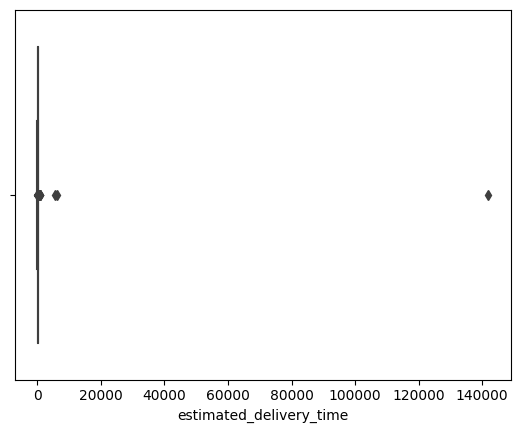

In [36]:
# create boxplot of estimated delivery time

sns.boxplot(x = df["estimated_delivery_time"])


In [37]:
df["estimated_delivery_time"].median()

44.333333333333336

In [38]:
# max and min of estimated delivery time    

df["estimated_delivery_time"].max(), df["estimated_delivery_time"].min()

(141947.65, 1.6833333333333333)

In [39]:
# top ten max time for estimated delivery time

df.nlargest(10, "estimated_delivery_time")

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,estimated_delivery_time
2690,1.0,2014-10-19 05:24:15,2015-01-25 19:11:54,675f9820626f5bc0afb47b57890b466e,italian,1.0,1,1695,1,1595,1595,NaN,NaN,NaN,141947.650000
185550,4.0,2015-01-28 08:34:06,2015-02-01 16:25:25,1679091c5a880faf6fb5e6087eb1b2dc,dessert,5.0,3,1520,3,220,750,0.0,0.0,0.0,6231.316667
27189,1.0,2015-02-16 02:24:09,2015-02-19 22:45:31,d397c2b2be2178fe6247bd50fc97cff2,indian,3.0,4,4980,4,995,1795,72.0,68.0,104.0,5541.366667
83055,2.0,2015-02-01 02:18:07,2015-02-01 18:08:39,c1502ae5a4d514baec129f72948c266e,burger,4.0,3,2379,2,389,695,109.0,102.0,163.0,950.533333
190860,1.0,2015-02-16 02:31:05,2015-02-16 17:38:32,b132ecc1609bfcf302615847c1caa69a,indian,3.0,4,3660,4,375,1195,71.0,70.0,111.0,907.450000
86952,3.0,2015-02-05 02:11:40,2015-02-05 15:34:38,831b342d8a83408e5960e9b0c5f31f0c,thai,2.0,3,2185,3,495,995,19.0,19.0,16.0,802.966667
76743,2.0,2015-02-15 04:17:35,2015-02-15 16:59:00,9380e398ee9bea45b992a3daaa6b7c4d,pizza,6.0,1,990,1,795,795,114.0,112.0,184.0,761.416667
105825,2.0,2015-02-08 04:07:51,2015-02-08 15:03:43,5fc7c9bd1fcb12799f02da8adfa4954f,alcohol,5.0,3,2850,3,200,1500,96.0,103.0,156.0,655.866667
66787,6.0,2015-02-04 20:21:30,2015-02-05 07:02:27,e85ca00d008a532279b798033d59a4c7,italian,1.0,1,795,1,795,795,NaN,NaN,NaN,640.950000
175971,1.0,2015-02-12 20:25:17,2015-02-13 07:01:00,5d616dd38211ebb5d6ec52986674b6e4,mexican,1.0,5,1530,3,300,315,24.0,25.0,30.0,635.716667


In [43]:
# checking the duplicates 

df.duplicated().sum()

0

In [ ]:
# check if created and delivered time are same 

df[df["created_at"] == df["actual_delivery_time"]].sum()

In [48]:
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
estimated_delivery_time         7
dtype: int64

total onshift partners and total busy partners are directly dependent on each other

In [65]:
# we can try mode imputaton based on group by wrto store_id 
# however let's try removing null values and try to solve the problem first 
# drop null values 
df.dropna(axis = 0, inplace=True)

In [69]:
df.drop(["created_at", "actual_delivery_time",'store_id'], axis = 1, inplace = True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   store_primary_category    176248 non-null  object 
 2   order_protocol            176248 non-null  float64
 3   total_items               176248 non-null  int64  
 4   subtotal                  176248 non-null  int64  
 5   num_distinct_items        176248 non-null  int64  
 6   min_item_price            176248 non-null  int64  
 7   max_item_price            176248 non-null  int64  
 8   total_onshift_partners    176248 non-null  float64
 9   total_busy_partners       176248 non-null  float64
 10  total_outstanding_orders  176248 non-null  float64
 11  estimated_delivery_time   176248 non-null  float64
 12  hour                      176248 non-null  int64  
 13  day                       176248 non-null  i

C:\Users\mahik\AppData\Local\Temp\ipykernel_6500\3415888245.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method="spearman").round(2), annot = True)


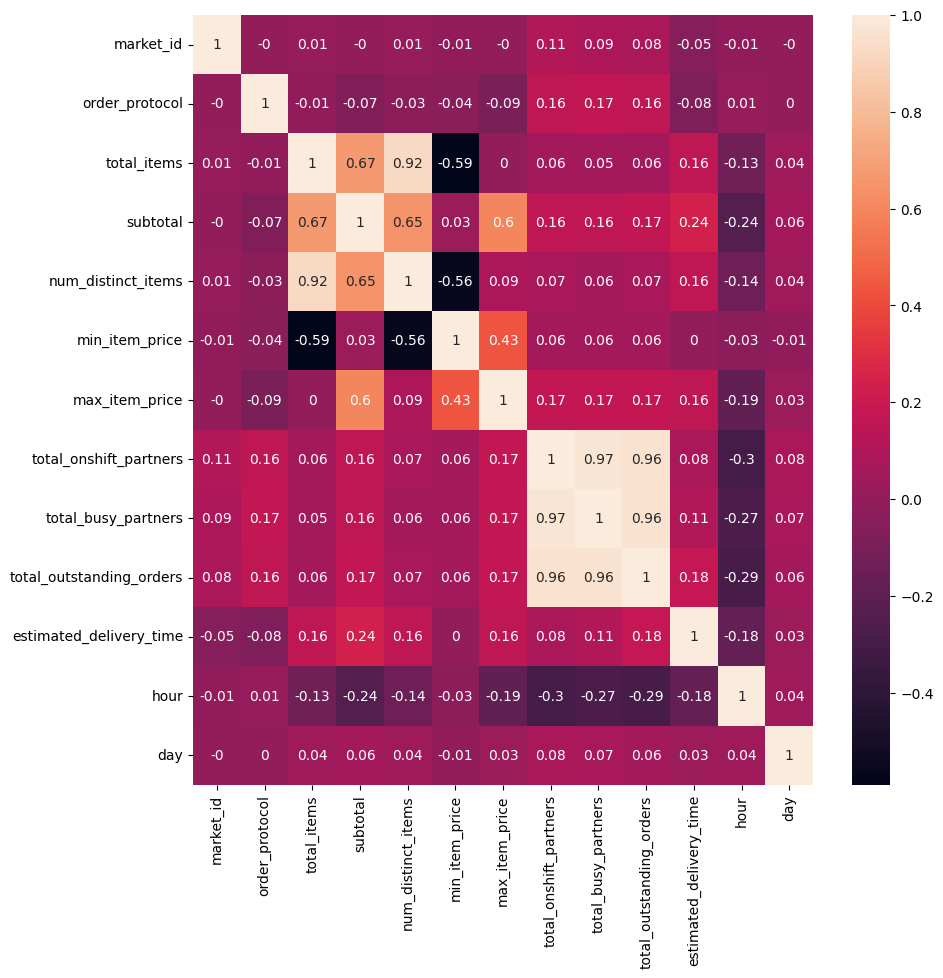

In [74]:
plt.figure(figsize = (10,10))

sns.heatmap(df.corr(method="spearman").round(2), annot = True)
plt.show()

In [78]:
# uni-variate analysis 
df["order_protocol"].value_counts()

1.0    48518
3.0    47271
5.0    41509
2.0    20958
4.0    17292
6.0      681
7.0       19
Name: order_protocol, dtype: int64

<AxesSubplot: xlabel='order_protocol', ylabel='count'>

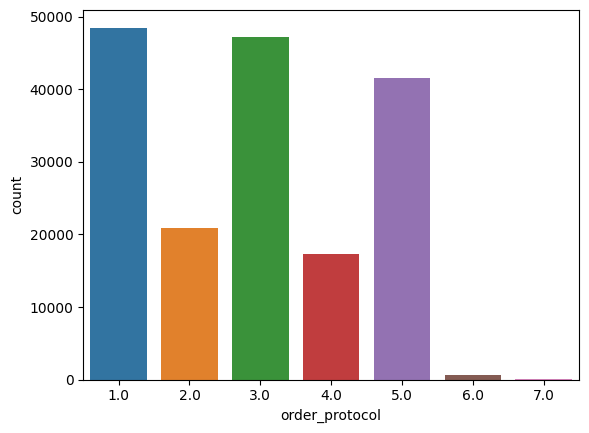

In [81]:
sns.countplot(data=df,x=df["order_protocol"])

most of the orders are placed through porter

<AxesSubplot: xlabel='day', ylabel='count'>

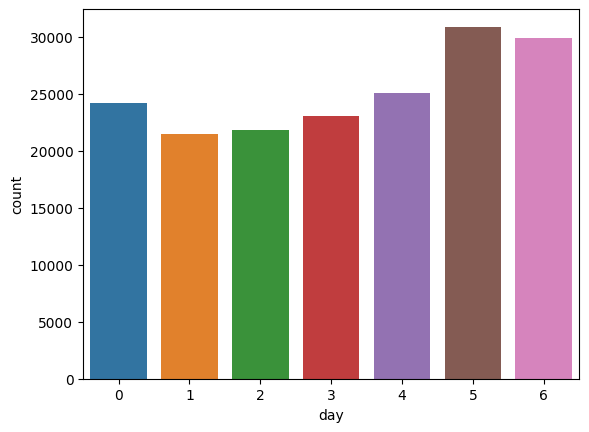

In [82]:
# let's see the day on which the orders are placed the most 
sns.countplot(data = df, x = df["day"])
# almost for all the days the order count is same

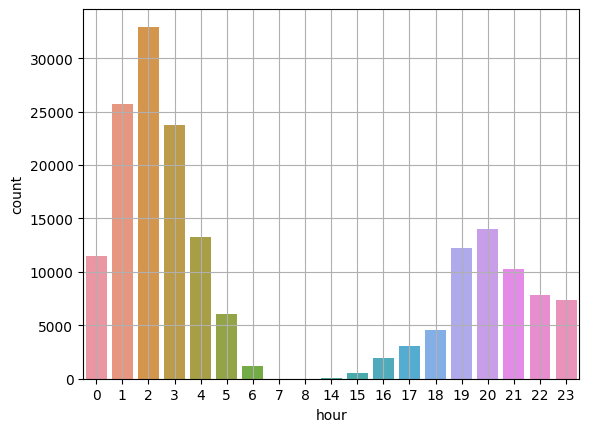

In [85]:
sns.countplot(data = df, x = df["hour"])
plt.grid()
plt.show()
# we could see the peak hour distribution

In [86]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'estimated_delivery_time', 'hour', 'day'],
      dtype='object')

<AxesSubplot: xlabel='market_id', ylabel='count'>

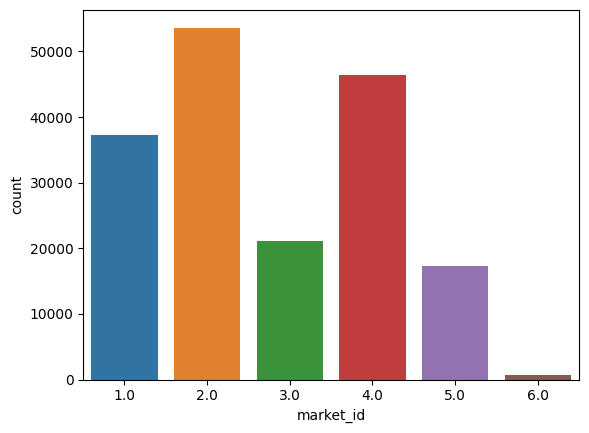

In [87]:
sns.countplot(data = df, x = df["market_id"])
# we can see that most of the orders are from market id 2

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   store_primary_category    176248 non-null  object 
 2   order_protocol            176248 non-null  float64
 3   total_items               176248 non-null  int64  
 4   subtotal                  176248 non-null  int64  
 5   num_distinct_items        176248 non-null  int64  
 6   min_item_price            176248 non-null  int64  
 7   max_item_price            176248 non-null  int64  
 8   total_onshift_partners    176248 non-null  float64
 9   total_busy_partners       176248 non-null  float64
 10  total_outstanding_orders  176248 non-null  float64
 11  estimated_delivery_time   176248 non-null  float64
 12  hour                      176248 non-null  int64  
 13  day                       176248 non-null  i

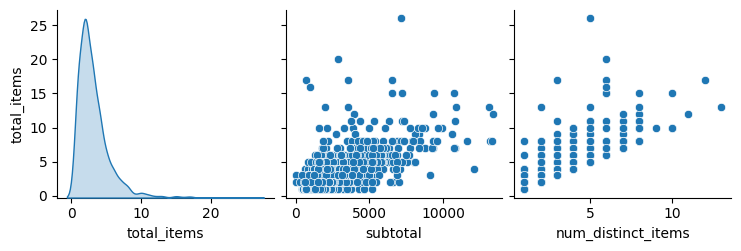

In [101]:
sns.pairplot(df.sample(1500), x_vars=['total_items', 'subtotal', 'num_distinct_items'],y_vars=['total_items'], diag_kind='kde')

In [102]:
# total_items and num_distinct_items are highly correlated 
# so we can drop num_distinct_items
df.drop(["num_distinct_items"], axis = 1, inplace = True)

<AxesSubplot: xlabel='total_outstanding_orders', ylabel='Density'>

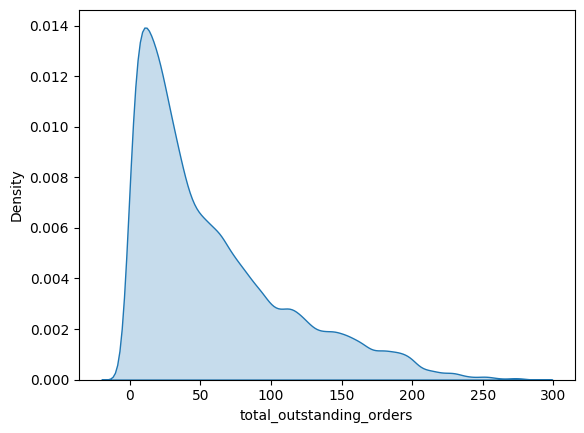

In [105]:
# let's check the distribution of orders 
sns.kdeplot(df["total_outstanding_orders"],fill=True)

<AxesSubplot: xlabel='day', ylabel='total_outstanding_orders'>

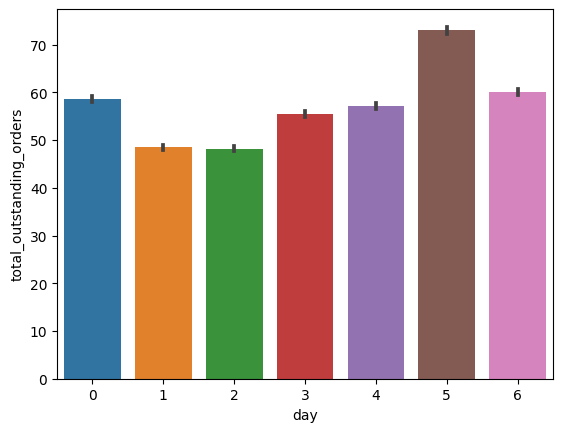

In [107]:
# total outstanding orders per each day 

sns.barplot(data = df, x = df["day"], y = df["total_outstanding_orders"])

<AxesSubplot: xlabel='day', ylabel='total_onshift_partners'>

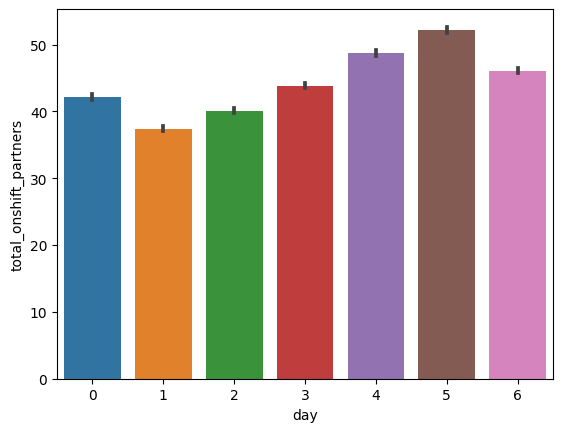

In [108]:
sns.barplot(data = df, x = df["day"], y = df["total_onshift_partners"])

In [ ]:
# do analysis with respect to target 
